In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False


# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [3]:
df = pd.read_csv('data/merged_data_brand_dropna.csv')

In [4]:
# datetime 컬럼 변환
df['event_time_moscow'] = pd.to_datetime(df['event_time_moscow'])

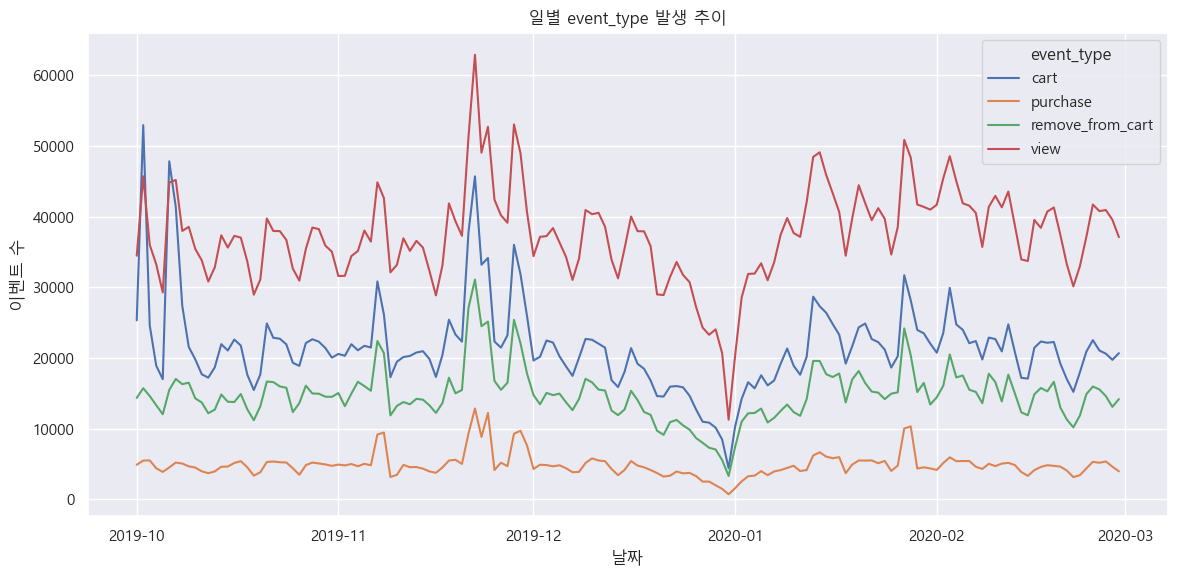

In [6]:
# 1. event_time이 datetime인 경우, 날짜만 추출
df['date'] = df['event_time_moscow'].dt.date  # 일자 기준

# 2. 이벤트 수 집계
daily_event_counts = df.groupby(['date', 'event_type']).size().unstack().fillna(0)

# 3. 시각화
for col in daily_event_counts.columns:
    plt.plot(daily_event_counts.index, daily_event_counts[col], label=col)

plt.title("일별 event_type 발생 추이")
plt.xlabel("날짜")
plt.ylabel("이벤트 수")
plt.legend(title="event_type")
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
import pandas as pd

# datetime 컬럼이 datetime 타입인지 확인 및 변환
df['event_time_moscow'] = pd.to_datetime(df['event_time_moscow'])

# 날짜만 추출 (예: 2025-07-28)
df['event_date'] = df['event_time_moscow'].dt.date

# 일별 + 이벤트별 수 집계
daily_event_counts = df.groupby(['event_date', 'event_type']).size().unstack(fill_value=0).reset_index()

# 결과 확인
print(daily_event_counts.head())

# CSV로 저장
daily_event_counts.to_csv('data/07_event_traffic_by_day.csv', index=False, encoding='utf-8-sig')


event_type  event_date   cart  purchase  remove_from_cart   view
0           2019-10-01  25314      4877             14333  34454
1           2019-10-02  52929      5470             15706  45689
2           2019-10-03  24585      5492             14601  35990
3           2019-10-04  18893      4379             13298  33243
4           2019-10-05  16984      3865             12027  29259


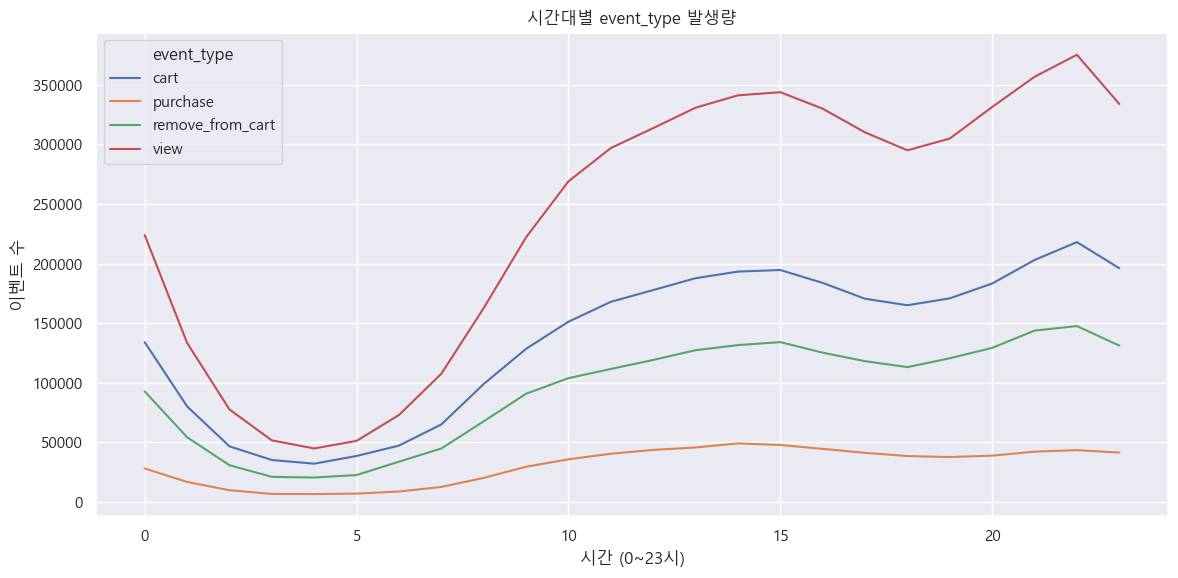

In [7]:
# 시간대 추출
df['hour'] = df['event_time_moscow'].dt.hour

# 시간별 event_type 수
hourly_event_counts = df.groupby(['hour', 'event_type']).size().unstack().fillna(0)

# 시각화
plt.figure(figsize=(12, 6))
for col in hourly_event_counts.columns:
    plt.plot(hourly_event_counts.index, hourly_event_counts[col], label=col)

plt.title("시간대별 event_type 발생량")
plt.xlabel("시간 (0~23시)")
plt.ylabel("이벤트 수")
plt.legend(title="event_type")
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
df['event_hour'] = df['event_time_moscow'].dt.hour
hourly_event_counts = df.groupby(['event_hour', 'event_type']).size().unstack(fill_value=0).reset_index()
hourly_event_counts.to_csv('data/07_event_traffic_by_hour.csv', index=False, encoding='utf-8-sig')

In [15]:
hourly_event_counts

event_type,event_hour,cart,purchase,remove_from_cart,view
0,0,134052,28107,92758,224024
1,1,80210,16812,54306,133485
2,2,46694,9855,30839,77623
3,3,35209,6739,21084,51689
4,4,32127,6636,20507,44904
5,5,38586,7021,22589,51272
6,6,47297,8750,33814,72966
7,7,65050,12607,44869,107598
8,8,98978,20177,67658,162697
9,9,128513,29582,90807,222097


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22284\2718197377.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['event_month'] = df['event_time_moscow'].dt.to_period('M').astype(str)


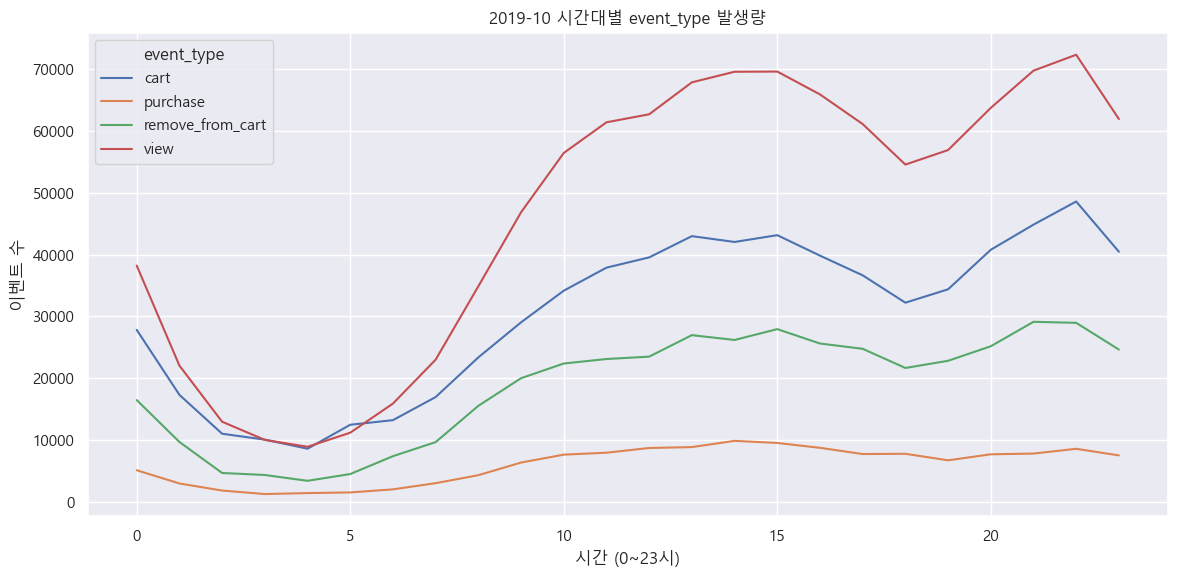

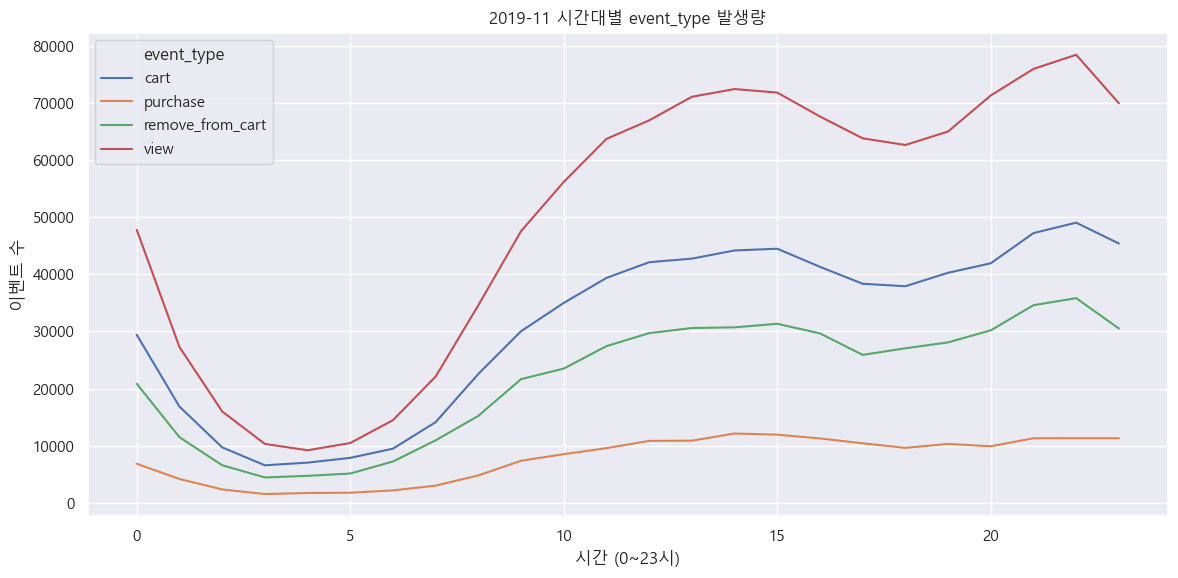

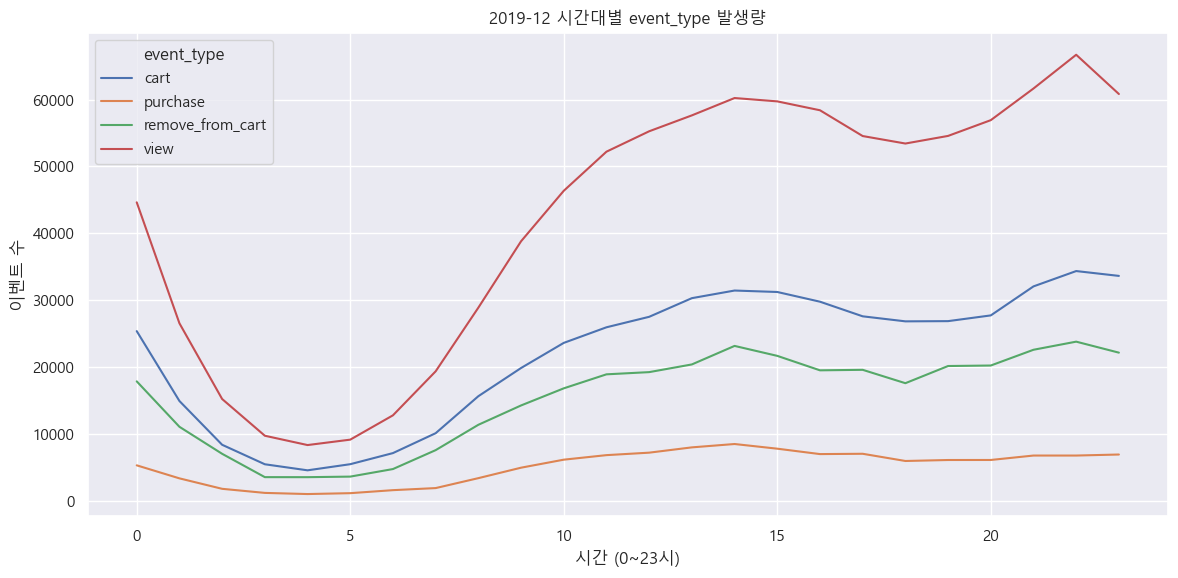

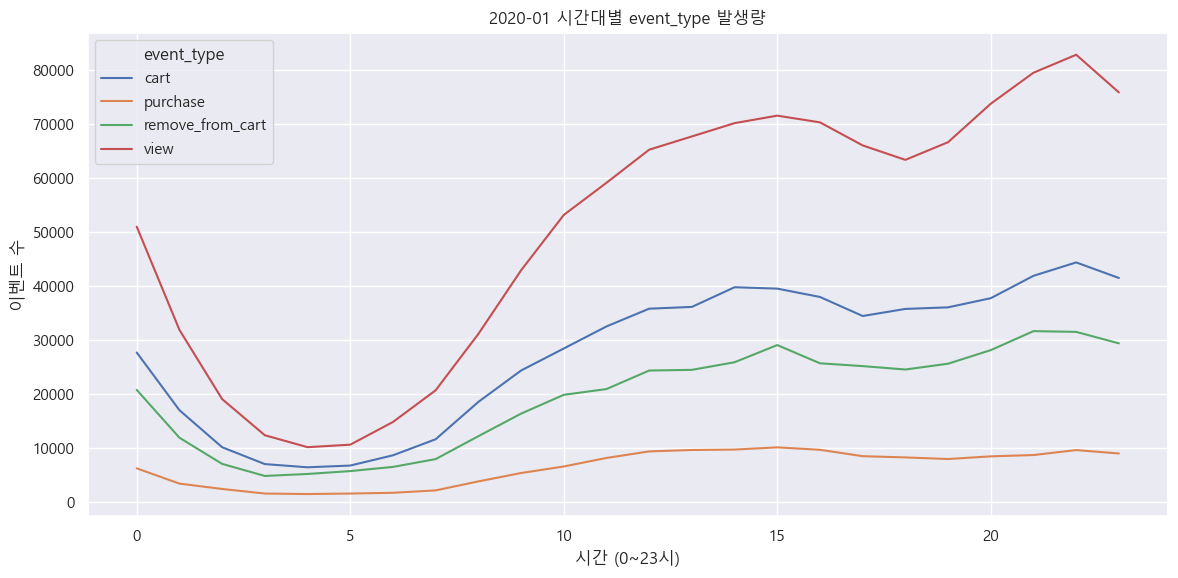

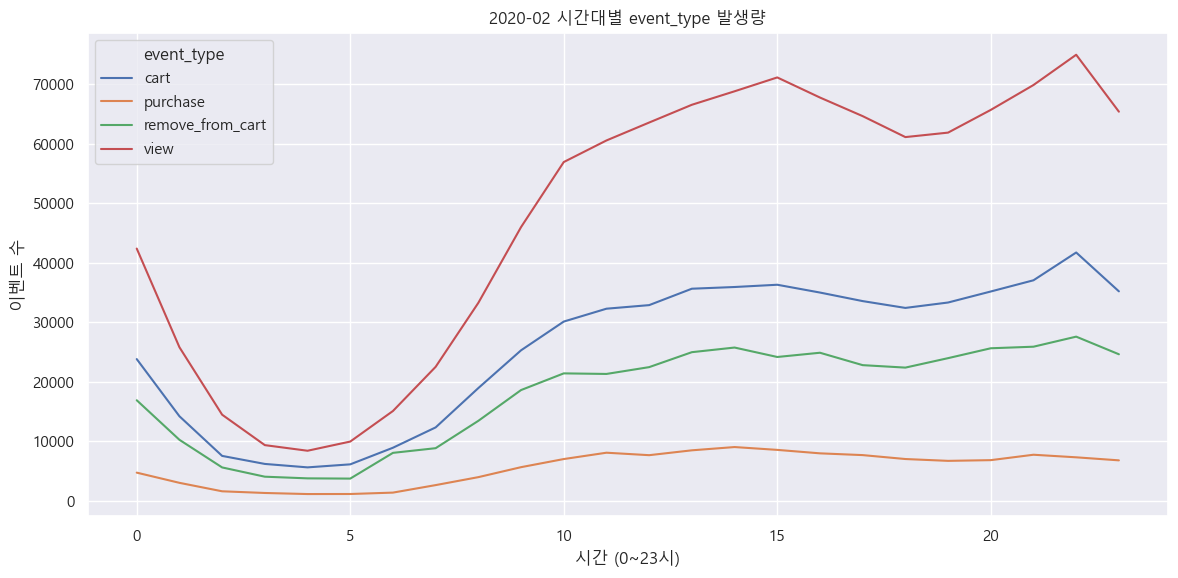

In [5]:
import matplotlib.pyplot as plt

# 1. 시간 및 월 추출
df['hour'] = df['event_time_moscow'].dt.hour
df['event_month'] = df['event_time_moscow'].dt.to_period('M').astype(str)

# 2. 월별 시간대별 event_type 집계
hourly_by_month = (
    df.groupby(['event_month', 'hour', 'event_type'])
    .size()
    .reset_index(name='event_count')
)

# 3. 월별로 반복하면서 시각화
months = sorted(hourly_by_month['event_month'].unique())

for month in months:
    month_df = hourly_by_month[hourly_by_month['event_month'] == month]

    # 피벗 테이블로 변환: 행=hour, 열=event_type
    pivot_df = month_df.pivot(index='hour', columns='event_type', values='event_count').fillna(0)

    # 시각화
    plt.figure(figsize=(12, 6))
    for col in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[col], label=col)
    
    plt.title(f"{month} 시간대별 event_type 발생량")
    plt.xlabel("시간 (0~23시)")
    plt.ylabel("이벤트 수")
    plt.legend(title="event_type")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [7]:
# 1. 시간 및 월 추출
df['hour'] = df['event_time_moscow'].dt.hour
df['event_month'] = df['event_time_moscow'].dt.to_period('M').astype(str)

# 2. 월별-시간대별-event_type 집계
hourly_by_month = (
    df.groupby(['event_month', 'hour', 'event_type'])
    .size()
    .reset_index(name='event_count')
)

# 3. 피벗 테이블로 변환 (행: event_month, hour / 열: event_type)
pivot_df = hourly_by_month.pivot_table(
    index=['event_month', 'hour'],
    columns='event_type',
    values='event_count',
    fill_value=0
).reset_index()

# 4. 컬럼 정리 (MultiIndex 제거)
pivot_df.columns.name = None  # 열 이름 계층 제거

# 5. CSV로 저장
pivot_df.to_csv('data/07_monthly_hourly_event_counts.csv', index=False)

# 결과 확인 (선택)
print(pivot_df.head())

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22284\1426327793.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['event_month'] = df['event_time_moscow'].dt.to_period('M').astype(str)


  event_month  hour     cart  purchase  remove_from_cart     view
0     2019-10     0  27808.0    5093.0           16450.0  38209.0
1     2019-10     1  17292.0    2953.0            9669.0  22024.0
2     2019-10     2  11000.0    1807.0            4650.0  12943.0
3     2019-10     3  10047.0    1241.0            4325.0  10008.0
4     2019-10     4   8580.0    1397.0            3384.0   8889.0
